## 概率论

目录
- 0.概率论的基本概念之间的关系
- 1.随机现象与概率
- 2.条件概率、乘法公式、全概率公式与贝叶斯公式
- 3.一维随机变量及其概率分布
- 4.一维随机变量的数字特征
- 5.多维随机变量及其概率分布
- 6.多维随机变量的数字特征
- 7.大数定律
- 8.中心极限定理

概率论思维导图

<div>
<img src="./images/概率论.svg" width="800" align="middle"/>
</div>

### 0.概率论的基本概念之间的关系

<div>
<img src="./images/12.svg" width="800" align="middle"/>
</div>

- 在随机现象和概率时学习了**样本点**与**样本空间**，并由样本点的集合构成**随机事件**，主要目的是计算某个随机事件的**概率**，其中有一类特殊的概率叫**条件概率**，由条件概率延伸出的三大公式：**乘法公式**、**全概率公式**以及**贝叶斯公式**。

- 在一维随机变量中，想用数理的形式研究这些随机事件及其概率，还能使用高等数学的理论研究，如：极限、微分学、积分学等。因此，随机变量诞生的目的其实就是为了将随机事件使用数轴范围表示出来，那随机变量每一个取值其实就是一个样本点，随机变量的定义域就是样本空间。计算由随机变量表示的随机事件的概率，可以从两个角度去计算，那就是使用概率直接计算的**分布函数**与间接使用密度计算的**密度函数/分布列**。在实际的现实应用上，记住一个函数或者使用计算机存储一个函数的各个取值是很困难的，而且有时候我们仅仅只需要知道随机变量的某个侧面的信息，因此**数字特征**就是这么诞生的。

- 在多维随机变量（维度是有限的）的讨论中，有时候影响某件事概率的因素会有很多个，单一随机变量不足以表达完整信息，需要使用多个随机变量才能表达更多的信息，因此根据线性代数的理论，将一维推广至多维可以使用向量/矩阵表达，**多维随机变量/随机向量**就此诞生。同时，我们需要将一维随机变量的所有理论推广至多维，因此**联合密度函数、联合分布列与联合分布函数**就此出现。多维随机变量的数字特征也由原来的单一的一个随机变量的数字特征推广至两个变量之间的数字特征，如**协方差、相关系数**等等。


### 1.随机现象与概率

1.1 随机现象

在一定条件下，并不总是出现相同结果的现象。如果事件的结果是固定的，可以用确定性的函数关系来表示。


1.2 随机试验

可重复的随机现象



1.3 样本点

随机现象的基本结果，常用 $\omega$ 表示 



1.4 样本空间

随机现象所有基本结果（样本点）的全体，常用 $\Omega=$ $\{\boldsymbol{\omega}\}$ 表示



1.5 随机事件

随机现象的某些基本结果组成的集合称为随机事件，简称事件，常用大写字母 $A, B, C$ 等表示



1.6 事件间的关系与运算
   - 包含事件：$A \subset B$ 或 $B \supset A$ （A发生B也发生）
   - 相等事件：$A=B$
   - 互斥事件：事件 $A$ 与 $B$ 不可能同时发生，$A \cap B=0$
   - 必然事件与不可能事件：任一个基本空间 $\Omega$ 都有一个最大子集（必然事件）和一个最小子集（不可能事件），用空集符号 $\phi$ 表示
   
   - 交运算：AB同时发生：$A \cap B$ 或者 AB
   - 并运算：AB至少一个发生：$A \cup B$ 或者 A+B
   - 差运算：A发生而B不发生：$A - B$ 或者 $A \bar B$；B发生而A不发生：$B - A$ 或者 $B \bar A$



1.7 事件的概率

概率的公理化定义：在一个随机现象中，用来表示任一个随机事件 $A$ 发生可能性大小的实数(即比率)称为该事件的概率，记为 $P(A)$， 并规定
   - 非负性公理：对任一事件 $A$，必有 $P(A) \geqslant 0$ 。
   - 正则性公理：必然事件的概率 $P(\Omega)=1$ 。
   - 可加性公理： 若 $A_{1}$ 与 $A_{2}$ 是两个互不相容事件(即 $\left.A_{1} A_{2}=\phi\right)$, 则有 $P\left(A_{1} \cup A_{2}\right)=P\left(A_{1}\right)+P\left(A_{2}\right)$



1.8 事件的独立性

两个事件之间的独立性是指一个事件的发生不影响另一个事件的发生

定义：对任意两个事件 $A$ 与 $B$， 若有 $P(A B)=P(A) P(B)$， 则称事件 $\boldsymbol{A}$ 与 $\boldsymbol{B}$ 相互独立，简称 $A$ 与$B$独立。

代码：模拟频率近似概率

In [7]:
# 引入相关工具库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

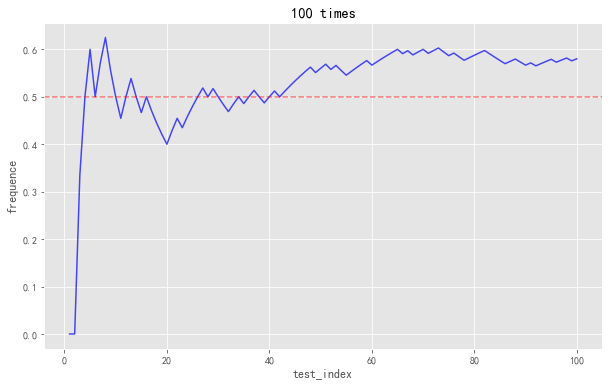

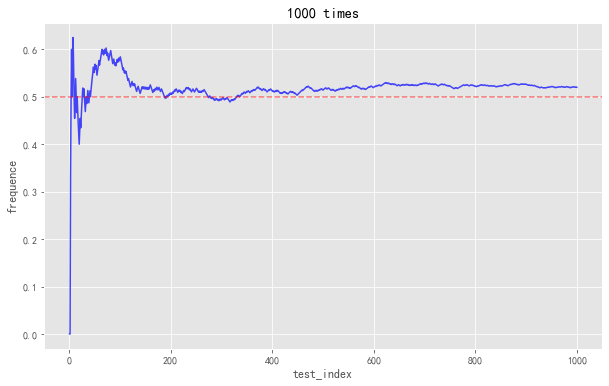

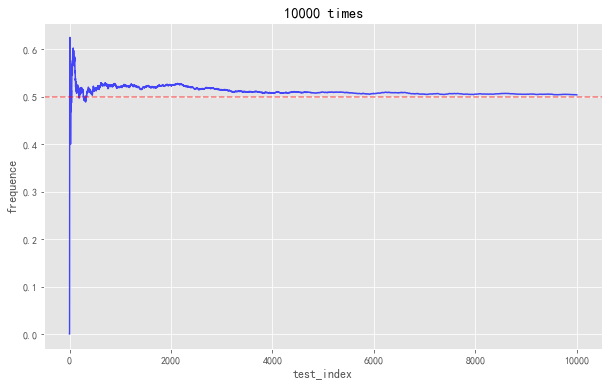

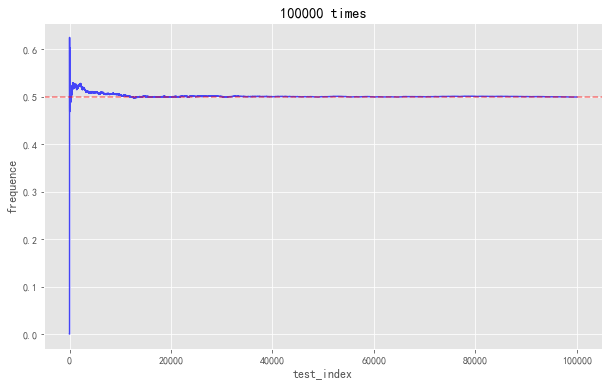

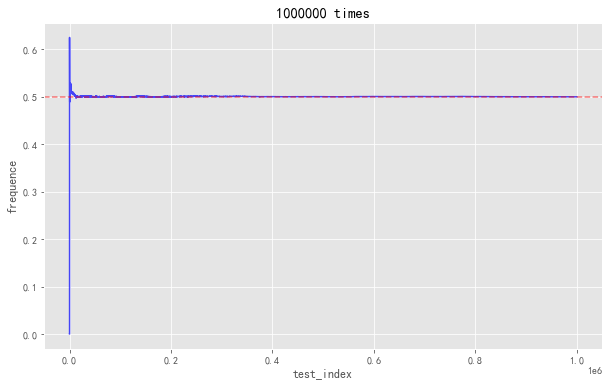

In [6]:
# 模拟抛硬币正面的概率是否会越来越接近0.5
import random


def Simulate_coin(test_num):
    random.seed(100)
    coin_list = [1 if (random.random() >= 0.5) else 0 for i in range(test_num)]  # 模拟试验结果
    coin_frequence = np.cumsum(coin_list) / (np.arange(len(coin_list)) + 1)  # 计算正面为1的频率
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(coin_list)) + 1, coin_frequence, c='blue', alpha=0.7)
    plt.axhline(0.5, linestyle='--', c='red', alpha=0.5)
    plt.xlabel("test_index")
    plt.ylabel("frequence")
    plt.title(str(test_num) + " times")
    plt.show()


Simulate_coin(test_num=100)
Simulate_coin(test_num=1000)
Simulate_coin(test_num=10000)
Simulate_coin(test_num=100000)
Simulate_coin(test_num=1000000)

### 2.条件概率、乘法公式、全概率公式与贝叶斯公式

2.1 条件概率

条件概率要涉及两个事件 $A$ 与 $B$ ，在事件 $B$ 已发生的条件下，事件 $A$ 再发生的概率称为条件概率，记为 $P(A \mid B)$。

设 $A$ 与 $B$ 是基本空间 $\Omega$ 中的两个事件,且 $P(B)>0$,在事件 $B$ 已发生的条件下, 事件 $A$ 的条件概率 $P(A \mid B)$ 定义为 $P(A B) / P(B)$, 即
$$
P(A \mid B)=\frac{P(A B)}{P(B)}
$$
其中 $P(A \mid B)$ 也称为给定事件 $B$ 下事件 $A$ 的条件概率。



2.2 乘法公式

乘法公式是如下：
   - 若 $P(B)>0$, 则$P(A B)=P(B) P(A \mid B)$
   - 若 $P\left(A_{1} A_{2} \cdots A_{n-1}\right)>0$, 则$P\left(A_{1} A_{2} \cdots A_{n}\right)=P\left(A_{1}\right) P\left(A_{2} \mid A_{1}\right) P\left(A_{3} \mid A_{1} A_{2}\right) \cdots P\left(A_{n} \mid A_{1} A_{2} \cdots A_{n-1}\right)$

想要计算$A$、$B$同时发生的概率，那么可以先让事件B发生，计算事件B发生的概率$P(B)$，再计算$B$发生的条件下$A$发生的概率$P(A|B)$。



2.3 全概率公式

全概率公式是计算复杂概率的一个重要方法，使一个复杂概率的计算能化繁为简。

设 $B_{1}, B_{2}, \cdots, B_{n}$ 是基本空间 $\Omega$ 的一个分割,则对 $\Omega$ 中任一事件 $A$,有
$$
P(A)=\sum_{i=1}^{n} P\left(A \mid B_{i}\right) P\left(B_{i}\right)
$$


2.4 贝叶斯公式

结合条件概率公式、乘法公式和全概率公式，我们能得到强大的贝叶斯公式。

首先，我们写出所要求的复杂的$P\left(B_{k} \mid A\right)$的定义公式，即：
$$
P\left(B_{k} \mid A\right) = \frac{P(AB_k)}{P(A)}
$$
其次，我们对分子分母分别使用乘法公式和全概率公式展开，即：
$$
P\left(B_{k} \mid A\right)=\frac{P\left(A \mid B_{k}\right) P\left(B_{k}\right)}{\sum_{i=1}^{n} P\left(A \mid B_{i}\right) P\left(B_{i}\right)}, \quad k=1,2, \cdots, n
$$


### 3.一维随机变量及其概率分布


3.1 分布函数

设 $X$ 为一个随机变量,对任意实数 $x$,事件“ $X \leqslant x$ ”的概率 是 $x$ 的函数,记为
$$
F(x)=P(X \leqslant x)
$$
这个函数称为 $X$ 的累积概率分布函数,简称分布函数。
$$
\begin{aligned}
&P(a<X \leqslant b)=F(b)-F(a) \\
&P(X=a)=F(a)-F(a-0) \\
&P(X \geqslant b)=1-F(b-0) \\
&P(X>b)=1-F(b)\\
&P(X<b)=F(b-0) \\
&P(a<X<b)=F(b-0)-F(a) \\
&P(a \leqslant X \leqslant b)=F(b)-F(a-0) \\
&P(a \leqslant X<b)=F(b-0)-F(a-0)
\end{aligned}
$$

特别当 $F(x)$ 在 $a$ 与 $b$ 处连续时, 有
$$
F(a-0)=F(a), \quad F(b-0)=F(b) 
$$


3.2 密度函数

某个区间内的概率 = 区间长度 * 长度内的概率密度，就好像一个小面积的质量等于面积内的密度 * 面积。因此，概率的计算变成以下的表示：对任意两个实数 $a$ 与 $b$,其中 $a<b$, 且 $a$ 可为 $-\infty, b$ 可为 $+\infty, X$ 在区间 $[a, b]$ 上取值的概率为曲线 $p(x)$ 在该区间上曲边梯形的面积,即
$$
P(a \leqslant X \leqslant b)=\int_{a}^{b} p(x) d x
$$
则称密度函数 $p(x)$ 为连续随机变量 $X$ 的概率分布,或简称 $p(x)$ 为 $X$ 的密度 函数,记为 $X \sim p(x)$, 读作“ $X$ 服从密度 $p(x)$ ”。

对于离散随机变量来说，我们往往使用**分布列**去对应连续随机变量密度函数的概念。因为连续随机变量的密度函数使用的是积分来表达的，而离散情况下往往只需要简单的求和就可以了，实际上积分就是符号$\int$就是拉长的求和符号$\sum$他们本质上都是求和。因此，
设 $X$ 是一个离散随机变量,如果 $X$ 的所有可能取值是 $x_{1}, x_{2}, \cdots$, $x_{n}, \cdots$, 则称 $X$ 取 $x_{i}$ 的概率
$$
p_{i}=p\left(x_{i}\right)=P\left(X=x_{i}\right), i=1,2, \cdots, n, \cdots
$$
为 $X$ 的概率分布列或简称为分布列, 记为 $X \sim\left\{p_{i}\right\}$

分布列如下图：
$$
\begin{array}{c|ccccc}
X & x_{1} & x_{2} & \cdots & x_{n} & \cdots \\
\hline P & p\left(x_{1}\right) & p\left(x_{2}\right) & \cdots & p\left(x_{n}\right) & \cdots
\end{array}
$$



例子：投掷一颗骰子，设$X$为投掷的点数，求随机变量$X$分布列和分布函数。

解：

分布列：
$$
\begin{array}{c|cccccc}
X & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline P & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6}
\end{array}
$$

分布函数：
$$
F(x)=P(X \leqslant x) = \begin{cases}0, & x<1 \\ \frac{i}{6}, & i \le x < i+1, i=1,2,3,4,5 \\ 1, & x \ge 6\end{cases}
$$


In [3]:
# 已知密度函数求分布函数/已知分布函数求密度函数：
# 已知柯西分布的密度函数求分布函数
from sympy import *
x = symbols('x')
p_x = 1/pi*(1/(1+x**2))
integrate(p_x, (x, -oo, x))

atan(x)/pi + 1/2

In [4]:
# 已知柯西分布的分布函数求密度函数
from sympy import *
x = symbols('x')
f_x = 1/pi*(atan(x)+pi/2)
diff(f_x,x,1)

1/(pi*(x**2 + 1))

3.3 常见的连续型随机变量及其密度函数



3.3.1 均匀分布

一般地，在有限区间 $[a, b]$ 上为常数,在此区间外为零的密度函 数 $p(x)$ 都称为均匀分布,并记为 $U(a, b)$, 其密度函数为
$$
p(x)= \begin{cases}\frac{1}{b-a}, & a \leqslant x \leqslant b \\ 0, & \text { 其它 }\end{cases}
$$
均匀分布的分布函数为：
$$
F(x)= \begin{cases}0, & x<a \\ \frac{x-a}{b-a}, & a \leqslant x<b \\ 1, & x \geqslant b\end{cases}
$$


x----------
 [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
y----------
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


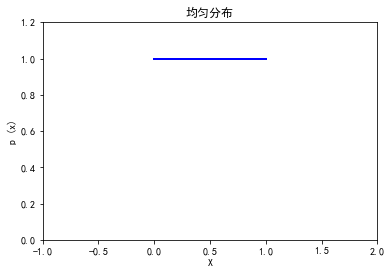

In [6]:
# [0，1]上的均匀分布
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

a = float(0)
b = float(1)

x = np.linspace(a, b)
print("x----------\n", x)
y = np.full(shape=len(x), fill_value=1 / (b - a))  # np.full 构造一个数组，用指定值填充其元素
print("y----------\n", y)

plt.plot(x, y, "b", linewidth=2)
plt.ylim(0, 1.2)
plt.xlim(-1, 2)
plt.xlabel('X')
plt.ylabel('p (x)')
plt.title('均匀分布')
plt.show()


3.3.2 指数分布

若随机变量 $X$ 的密度函数为
$$
p(x)=\left\{\begin{aligned}
\lambda e^{-\lambda x}, & x \geqslant 0 \\
0, & x<0
\end{aligned}\right.
$$
则称 $X$ 服从指数分布, 记作 $X \sim \operatorname{Exp}(\lambda)$, 其中参数 $\lambda>0$。其中 $\lambda$ 是根据实际背景而定的正参数。假如某连续随机变量 $X \sim \operatorname{Exp}(\lambda)$, 则表示 $X$ 仅可能取非负实数。

指数分布的分布函数为：
$$
F(x)= \begin{cases}1-\mathrm{e}^{-\lambda x}, & x \geqslant 0 \\ 0, & x<0\end{cases}
$$


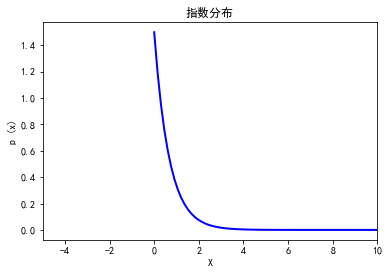

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 指数分布
lam = float(1.5)

x = np.linspace(0, 15, 100)
y = lam * np.e ** (-lam * x)

plt.plot(x, y, "b", linewidth=2)
plt.xlim(-5, 10)
plt.xlabel('X')
plt.ylabel('p (x)')
plt.title('指数分布')
plt.show()

3.3.3 正态分布

正态分布又称为高斯分布

若随机变量 $X$ 的密度函数为
$$
p(x)=\frac{1}{\sqrt{2 \pi} \sigma} \mathrm{e}^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}, \quad-\infty<x<\infty,
$$
则称 $X$ 服从正态分布， 称 $X$ 为正态变量， 记作 $X \sim N\left(\mu, \sigma^{2}\right)$。 其中参数 $-\infty<\mu<\infty, \sigma>0$。

In [8]:
# 已知正态分布的密度函数求分布函数
from sympy import *
from sympy.abc import mu, sigma

x = symbols('x')
p_x = 1 / (sqrt(2 * pi) * sigma) * E ** (-(x - mu) ** 2 / (2 * sigma ** 2))
integrate(p_x, (x, -oo, x))

sqrt(2)*exp(-mu**2/(2*sigma**2))*Integral(exp(-x**2/(2*sigma**2))*exp(mu*x/sigma**2), (x, -oo, x))/(2*sqrt(pi)*sigma)

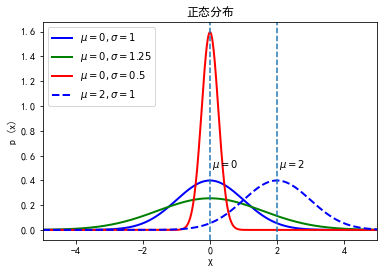

In [9]:
# 正态分布
import math
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

mu = float(0)
mu1 = float(2)
sigma1 = float(1)
sigma2 = float(1.25) * float(1.25)
sigma3 = float(0.25)
x = np.linspace(-5, 5, 1000)
y1 = np.exp(-(x - mu) ** 2 / (2 * sigma1 ** 2)) / (math.sqrt(2 * math.pi) * sigma1)
y2 = np.exp(-(x - mu) ** 2 / (2 * sigma2 ** 2)) / (math.sqrt(2 * math.pi) * sigma2)
y3 = np.exp(-(x - mu) ** 2 / (2 * sigma3 ** 2)) / (math.sqrt(2 * math.pi) * sigma3)
y4 = np.exp(-(x - mu1) ** 2 / (2 * sigma1 ** 2)) / (math.sqrt(2 * math.pi) * sigma1)
plt.plot(x, y1, "b", linewidth=2, label=r'$\mu=0,\sigma=1$')
plt.plot(x, y2, "g", linewidth=2, label=r'$\mu=0,\sigma=1.25$')
plt.plot(x, y3, "r", linewidth=2, label=r'$\mu=0,\sigma=0.5$')
plt.plot(x, y4, "b", linewidth=2, label=r'$\mu=2,\sigma=1$', ls='--')
plt.axvline(x=mu, ls='--')
plt.text(x=0.05, y=0.5, s=r'$\mu=0$')
plt.axvline(x=mu1, ls='--')
plt.text(x=2.05, y=0.5, s=r'$\mu=2$')
plt.xlim(-5, 5)
plt.xlabel('X')
plt.ylabel('p (x)')
plt.title('正态分布')
plt.legend()
plt.show()


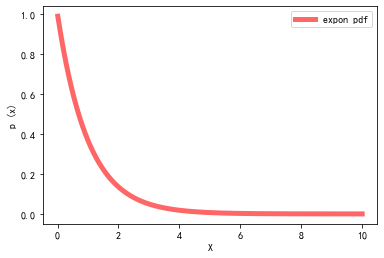

In [10]:
# 使用scipy计算pdf画图(非自定义函数)
# 参考链接 (https://vimsky.com/examples/usage/python-scipy.stats.expon.html)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x = np.linspace(0.01, 10, 1000)
plt.plot(x, expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

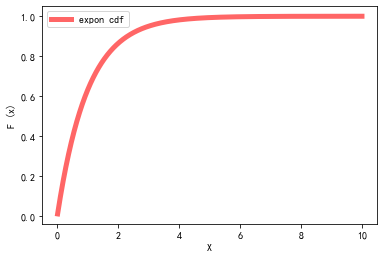

In [11]:
# 使用scipy计算cdf画图(非自定义函数)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x = np.linspace(0.01, 10, 1000)
plt.plot(x, expon.cdf(x), 'r-', lw=5, alpha=0.6, label='expon cdf')
plt.xlabel("X")
plt.ylabel("F (x)")
plt.legend()
plt.show()

3.4 常见的离散型随机变量及其分布列


3.4.1 0-1分布

又称伯努利分布，满足相互独立、只取两个值的随机变量通常称为伯努利随机变量。进行一次事件试验，该事件发生的概率为$p$，不发生的概率为$1-p$。这是一个最简单的分布，任何一个只有两种结果的随机现象都服从0-1分布。
$$
P\{X=k\}=p^{k}(1-p)^{1-k}
$$
其中 $k=0,1$ 。

分布列的形式：
$$
\begin{array}{c|cccccc}
X & 0 & 1  \\
\hline P & p & 1-p 
\end{array}
$$



3.4.2 二项分布

用 $B_{n, k}$ 表示事件“ $n$ 重伯努里试验中成功出现 $k$ 次”。如今我们用随机变量来表示这个事件。设 $X$ 为 $n$ 重伯努里试验中成功的次数,则有 $B_{n, k}=$ “$ X=k $” 。其中 $X$ 可能取的值为 $0,1, \cdots, n$, 它取这些值的概率为
$$
P(X=x)=\left(\begin{array}{l}
n \\
x
\end{array}\right) p^{x}(1-p)^{n-x}, \quad x=0,1, \cdots, n
$$ 

例子：某特效药的临床有效率为 $0.95$， 今有 10 人服用， 问至少有 8 人治愈的概率是多少？

解：解 设 $X$ 为 10 人中被治愈的人数， 则 $X \sim b(10,0.95)$， 而所求概率为
$$
\begin{aligned}
P(X \geqslant 8) &=P(X=8)+P(X=9)+P(X=10) \\
&=\left(\begin{array}{c}
10 \\
8
\end{array}\right) 0.95^{8} 0.05^{2}+\left(\begin{array}{c}
10 \\
9
\end{array}\right) 0.95^{9} 0.05+\left(\begin{array}{c}
10 \\
10
\end{array}\right) 0.95^{10} \\
&=0.0746+0.3151+0.5987=0.9884 .
\end{aligned}
$$
10 人中至少有 8 人被治愈的概率为 $0.9884$。



3.4.3 泊松分布

泊松分布
$$
P(X=x)=\frac{\lambda^{x}}{x !} e^{-\lambda}
$$
其中： $\lambda>0$ 是常数，是区间事件发生率的均值。泊松分布是一种常用的离散分布, 它常与单位时间 (或单位面积、单位产品等)上 的计数过程相联系, 譬如,
   - 在一天内，来到某商场的顾客数。（$\lambda$就是单位时间内商场的顾客数）
   - 在单位时间内，一电路受到外界电磁波的冲击次数。
   - 1 平方米内， 玻璃上的气泡数。
   - 一铸件上的砂眼数。
   - 在一定时期内， 某种放射性物质放射出来的 $\alpha$-粒子数， 等等。 

以上的例子都服从泊松分布。 因此泊松分布的应用面是十分广泛的。

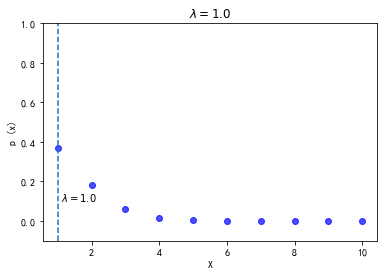

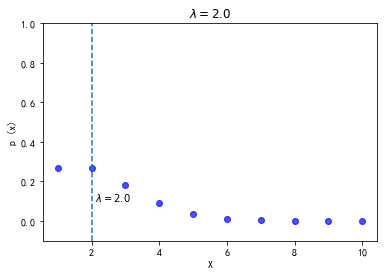

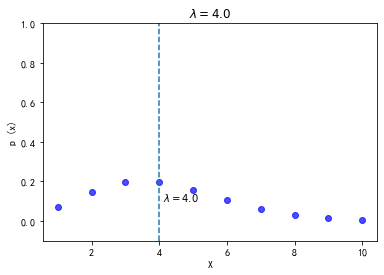

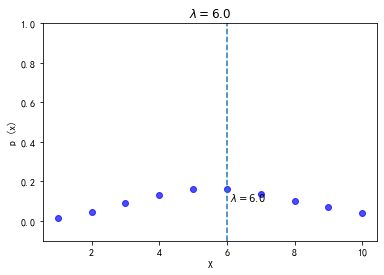

In [13]:
# 对比不同的lambda对泊松分布的影响
# 位于lambda（均值）附近概率较大.随着lambda的增加, 分布逐渐趋于对称
import math
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 构造泊松分布列的计算函数
def poisson(lmd, x):
    return pow(lmd, x) / math.factorial(x) * math.exp(-lmd)


x = [i + 1 for i in range(10)]
lmd1 = 1.0
lmd2 = 2.0
lmd3 = 4.0
lmd4 = 6.0
p_lmd1 = [poisson(lmd1, i) for i in x]
p_lmd2 = [poisson(lmd2, i) for i in x]
p_lmd3 = [poisson(lmd3, i) for i in x]
p_lmd4 = [poisson(lmd4, i) for i in x]

plt.scatter(np.array(x), p_lmd1, c='b', alpha=0.7)
plt.axvline(x=lmd1, ls='--')
plt.text(x=lmd1 + 0.1, y=0.1, s=r"$\lambda=1.0$")
plt.ylim(-0.1, 1)
plt.xlabel("X")
plt.ylabel("p (x)")
plt.title(r"$\lambda = 1.0$")
plt.show()

plt.scatter(np.array(x), p_lmd2, c='b', alpha=0.7)
plt.axvline(x=lmd2, ls='--')
plt.text(x=lmd2 + 0.1, y=0.1, s=r"$\lambda=2.0$")
plt.ylim(-0.1, 1)
plt.xlabel("X")
plt.ylabel("p (x)")
plt.title(r"$\lambda = 2.0$")
plt.show()

plt.scatter(np.array(x), p_lmd3, c='b', alpha=0.7)
plt.axvline(x=lmd3, ls='--')
plt.text(x=lmd3 + 0.1, y=0.1, s=r"$\lambda=4.0$")
plt.ylim(-0.1, 1)
plt.xlabel("X")
plt.ylabel("p (x)")
plt.title(r"$\lambda = 4.0$")
plt.show()

plt.scatter(np.array(x), p_lmd4, c='b', alpha=0.7)
plt.axvline(x=lmd4, ls='--')
plt.text(x=lmd4 + 0.1, y=0.1, s=r"$\lambda=6.0$")
plt.ylim(-0.1, 1)
plt.xlabel("X")
plt.ylabel("p (x)")
plt.title(r"$\lambda = 6.0$")
plt.show()


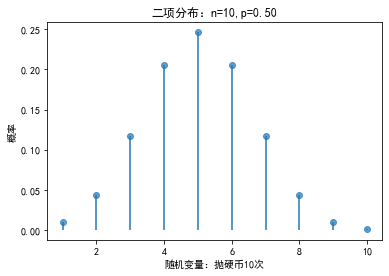

In [15]:
# 使用scipy的pmf画图
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

n = 10
p = 0.5
x = np.arange(1, n + 1, 1)
pList = binom.pmf(x, n, p)
plt.plot(x, pList, marker='o', alpha=0.7, linestyle='None')
# 绘制竖直线 vline(x坐标值, y坐标最小值, y坐标值最大值)
plt.vlines(x, 0, pList)
plt.xlabel('随机变量：抛硬币10次')
plt.ylabel('概率')
plt.title('二项分布：n=%d,p=%0.2f' % (n, p))
plt.show()

### 4.一维随机变量的数字特征


4.1 均值

又称数学期望，是指用概率分布算得的一种加权平均。

离散型随机变量的数学期望：

设**离散随机变量** $X$ 的分布列为
$$
P=\left(X=x_{i}\right)=p\left(x_{i}\right), \quad i=1,2, \cdots, n
$$
则：
$$
E(X)=\sum_{i=1}^{n} x_{i} p\left(x_{i}\right)
$$

连续型随机变量的数学期望：

设**连续随机变量** $X$ 有密度函数 $p(x)$, 如果积分
$$
\int_{-\infty}^{\infty}|x| p(x) d x
$$
有限,则称
$$
E(X)=\int_{-\infty}^{\infty} x p(x) d x
$$
为 $X$ 的数学期望,简称期望,期望值或均值。如果积分无限,则说 $X$ 的数学期望不存在。

数学期望的性质：
   - 若 $c$ 是常数， 则 $E(c)=c$。
   - 对任意常数 $a$， 有$E(a X)=a E(X)$。
   - 设 $(X, Y)$ 是二维随机变量, 则有$E(X+Y)=E(X)+E(Y)$
   - 若随机变量 $X$ 与 $Y$ 相互独立, 则有$E(X Y)=E(X) E(Y) $
   

常见分布的数学期望：
   - 0-1分布：$E(X)=p$
   - 二项分布：$E(X) = np$
   - 泊松分布：$E(X) = \lambda$
   - 均匀分布：$E(X) = \frac{a+b}{2}$
   - 指数分布：$E(X) = \frac{1}{\lambda}$
   - 正态分布：$E(X) = \mu$

4.2 方差与标准差

方差是衡量随机变量波动程度的数学量，具体的：数学期望 $E(X)$ 是分布的位置特征数，它总位于分布的中心，随机变量 $X$ 的取值总在其周围波动。方差是度量此种波动大小的最重要的特征数。


若随机变量 $X^{2}$ 的数学期望 $E\left(X^{2}\right)$ 存在， 则称偏差平方 $(X-E(X))^{2}$ 的数学期望 $E(X-E(X))^{2}$ 为随机变量 $X$ (或相应分布) 的方差， 记为：
$$
\operatorname{Var}(X)=E(X-E(X))^{2}
$$

离散型随机变量的方差：
$$
\sum_{i}\left(x_{i}-E(X)\right)^{2} p\left(x_{i}\right)
$$
连续型随机变量的方差：
$$
\int_{-\infty}^{\infty}(x-E(X))^{2} p(x) \mathrm{d} x
$$
方差的正平方根 $[\operatorname{Var}(X)]^{1 / 2}$ 称为随机变量 $X($ 或相应分布 $)$ 的标准差,记为 $\sigma_{X}$ 或 $\sigma(X)$ 。

方差的性质：
   - 最重要的性质：$\operatorname{Var}(X)=E\left(X^{2}\right)-[E(X)]^{2}$
   - 常数的方差为 0 ， 即 $\operatorname{Var}(c)=0$， 其中 $c$ 是常数。
   - 若 $a, b$ 是常数，则 $\operatorname{Var}(a X+b)=a^{2} \operatorname{Var}(X)$。
   - 若随机变量 $X$ 与 $Y$ 相互独立， 则有$\operatorname{Var}(X \pm Y)=\operatorname{Var}(X)+\operatorname{Var}(Y) $

常见分布的方差：
   - 0-1分布：$Var(X) = p(1-p)$
   - 二项分布：$Var(X) = np(1-p)$
   - 泊松分布：$Var(X) = \lambda$
   - 均匀分布：$Var(X) = \frac{(b-a)^{2}}{12}$
   - 正态分布：$Var(X) = \sigma^2$
   - 指数分布：$Var(X) = \frac{1}{\lambda^{2}}$

In [17]:
# 使用scipy计算常见分布的均值与方差
import numpy as np
from scipy.stats import bernoulli  # 0-1分布
from scipy.stats import binom  # 二项分布
from scipy.stats import poisson  # 泊松分布
from scipy.stats import uniform  # 均匀分布
from scipy.stats import norm  # 正态分布
from scipy.stats import expon  # 指数分布


print("0-1分布的数字特征：均值:{}；方差:{}；标准差:{}".format(bernoulli(p=0.5).mean(),
                                             bernoulli(p=0.5).var(),
                                             bernoulli(p=0.5).std()))
print("二项分布b(100,0.5)的数字特征：均值:{}；方差:{}；标准差:{}".format(binom(n=100, p=0.5).mean(),
                                                      binom(n=100, p=0.5).var(),
                                                      binom(n=100, p=0.5).std()))
## 模拟抛骰子的特定分布
xk = np.arange(6) + 1
pk = np.array([1.0 / 6] * 6)
print("泊松分布P(0.6)的数字特征：均值:{}；方差:{}；标准差:{}".format(poisson(0.6).mean(),
                                                  poisson(0.6).var(),
                                                  poisson(0.6).std()))
print("均匀分布U(1,1+5)的数字特征：均值:{}；方差:{}；标准差:{}".format(uniform(loc=1, scale=5).mean(),
                                                    uniform(loc=1, scale=5).var(),
                                                    uniform(loc=1, scale=5).std()))
print("正态分布N(0,0.0001)的数字特征：均值:{}；方差:{}；标准差:{}".format(norm(loc=0, scale=0.01).mean(),
                                                       norm(loc=0, scale=0.01).var(),
                                                       norm(loc=0, scale=0.01).std()))

lmd = 5.0  # 指数分布的lambda = 5.0
print("指数分布Exp(5)的数字特征：均值:{}；方差:{}；标准差:{}".format(expon(scale=1.0 / lmd).mean(),
                                                  expon(scale=1.0 / lmd).var(),
                                                  expon(scale=1.0 / lmd).std()))


0-1分布的数字特征：均值:0.5；方差:0.25；标准差:0.5
二项分布b(100,0.5)的数字特征：均值:50.0；方差:25.0；标准差:5.0
泊松分布P(0.6)的数字特征：均值:0.6；方差:0.6；标准差:0.7745966692414834
均匀分布U(1,1+5)的数字特征：均值:3.5；方差:2.083333333333333；标准差:1.4433756729740643
正态分布N(0,0.0001)的数字特征：均值:0.0；方差:0.0001；标准差:0.01
指数分布Exp(5)的数字特征：均值:0.2；方差:0.04000000000000001；标准差:0.2


4.3 分位数与中位数

基于连续型随机变量来说的，分位数是描述随机变量的位置的数字特征，我们把累计概率等于p所对应的随机变量取值x为p分位数，具体是：

设连续随机变量 $X$ 的分布函数为 $F(x)$，密度函数为 $p(x)$。 对任意 $p \in(0,1)$， 称满足条件
$$
F\left(x_{p}\right)=\int_{-\infty}^{x_{p}} p(x) \mathrm{d} x=p
$$
的 $x_{p}$ 为此分布的 $p$ 分位数， 又称下侧 $p$ 分位数。

<div>
<img src="./images/6.png" width="400" align="middle"/>
</div>

分位数与上侧分位数是可以相互转换的， 其转换公式如下：
$$
x_{p}^{\prime}=x_{1-p}, \quad x_{p}=x_{1-p}^{\prime} 
$$

**中位数就是p=0.5时的分位数点**，具体为：

设连续随机变量 $X$ 的分布函数为 $F(x)$， 密度函数为 $p(x)$。 称 $p=0.5$ 时的 $p$ 分位数 $x_{0.5}$ 为此分布的中位数，即 $x_{0.5}$ 满足
$$
F\left(x_{0.5}\right)=\int_{-\infty}^{x_{0.5}} p(x) \mathrm{d} x=0.5 
$$

<div>
<img src="./images/7.png" width="400" align="middle"/>
</div>


In [18]:
# 计算标准正态分布的0.25，0.5（中位数），0.75，0.95分位数点
from scipy.stats import norm

# 使用ppf计算分位数点
print("标准正态分布的0.25分位数：", norm(loc=0, scale=1).ppf(0.25))
print("标准正态分布的0.5分位数：", norm(loc=0, scale=1).ppf(0.5))
print("标准正态分布的0.75分位数：", norm(loc=0, scale=1).ppf(0.75))
print("标准正态分布的0.95分位数：", norm(loc=0, scale=1).ppf(0.95))

标准正态分布的0.25分位数： -0.6744897501960817
标准正态分布的0.5分位数： 0.0
标准正态分布的0.75分位数： 0.6744897501960817
标准正态分布的0.95分位数： 1.6448536269514722


### 5.多维随机变量及其概率分布

5.1 联合分布

一维随机变量的分布函数是一个关于x的函数，而n维随机变量的联合分布函数就是关于n个自变量的函数：

设 $X=\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 是 $n$ 维随机变量， 对任意 $n$ 个实数 $x_{1}, x_{2}, \cdots, x_{n}$ 所组成的 $n$ 个事件 $X_{1} \leqslant x_{1},X_{2} \leqslant x_{2} , \cdots, X_{n} \leqslant x_{n} $ 同时发生的概率
$$
F\left(x_{1}, x_{2}, \cdots, x_{n}\right)=P\left(X_{1} \leqslant x_{1}, X_{2} \leqslant x_{2}, \cdots, X_{n} \leqslant x_{n}\right)
$$
称为 $n$ 维随机变量 $\boldsymbol{X}$ 的联合分布函数

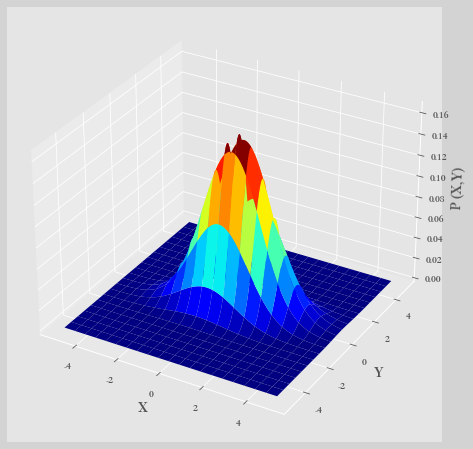

In [ ]:
# 绘制二维正态分布的联合概率密度曲面图
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d
x, y = np.mgrid[-5:5:.01, -5:5:.01]  # 返回多维结构
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
z = rv.pdf(pos)
plt.figure('Surface', facecolor='lightgray',figsize=(12,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('P (X,Y)', fontsize=14)
ax.plot_surface(x, y, z, rstride=50, cstride=50, cmap='jet')
plt.show()

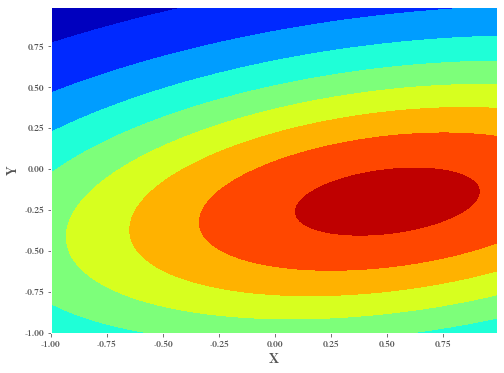

In [ ]:
# 绘制二维正态分布的联合概率密度等高线图
from scipy.stats import multivariate_normal
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
z = rv.pdf(pos)
fig = plt.figure(figsize=(8,6))
ax2 = fig.add_subplot(111)
ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.contourf(x, y, z, rstride=50, cstride=50, cmap='jet')
plt.show()

5.2 边缘分布

多维随机变量的联合密度函数、联合分布列或者联合分布函数蕴含了这个多维随机向量的所有信息，这些信息主要包括：
   - 每个分量的分布 (每个分量的所有信息), 即边缘分布。
   - 两个分量之间的关联程度， 用协方差和相关系数来描述。
   - 给定一个分量时，另一个分量的分布, 即条件分布。

多维随机向量中，每个元素即单一随机变量都可能受到这组向量其他随机变量的影响，这种影响可以通过协方差来反映。所谓的边缘分布，就是指多维随机向量中的其中一个随机变量$X$排除其他随机变量影响的分布，即$X$自身的分布。具体来说就是：

如果在二维随机变量 $(X, Y)$ 的联合分布函数 $F(x, y)$ 中令 $y \rightarrow \infty$， 由于 $\{Y<\infty\}$ 为必然事件， 故可得
$$
\lim _{y \rightarrow \infty} F(x, y)=P(X \leqslant x, Y<\infty)=P(X \leqslant x),
$$
这是由 $(X, Y)$ 的联合分布函数 $F(x, y)$ 求得的 $X$ 的分布函数， 被称为 $X$ 的边缘分布, 记为
$$
F_{X}(x)=F(x, \infty)
$$
类似地， 在 $F(x, y)$ 中令 $x \rightarrow \infty$， 可得 $Y$ 的边缘分布
$$
F_{Y}(y)=F(\infty, y) 
$$


5.3 条件分布

概率可以分为无条件概率和条件概率，而概率又是对随机事件发生可能性大小的描述；使用随机变量描述随机事件，使用分布函数/密度函数/分布列计算随机事件发生的概率

- 多维离散随机变量的条件分布列：

对一切使 $P\left(Y=y_{j}\right)=p_{. j}=\sum_{i=1}^{\infty} p_{i j}>0$ 的 $y_{j}$， 称
$$
p_{i \mid j}=P\left(X=x_{i} \mid Y=y_{j}\right)=\frac{P\left(X=x_{i}, Y=y_{j}\right)}{P\left(Y=y_{j}\right)}=\frac{p_{i j}}{p_{\cdot j}}, \quad i=1,2, \cdots
$$
为给定 $Y=y_{j}$ 条件下 $X$ 的条件分布列。

同理， 对一切使 $P\left(X=x_{i}\right)=p_{i}=\sum_{j=1}^{\infty} p_{i j}>0$ 的 $x_{i}$， 称
$$
p_{j i i}=P\left(Y=y_{j} \mid X=x_{i}\right)=\frac{P\left(X=x_{i}, Y=y_{j}\right)}{P\left(X=x_{i}\right)}=\frac{p_{i j}}{p_{i} .}, \quad j=1,2, \cdots
$$
为给定 $X=x_{i}$ 条件下 $Y$ 的条件分布列。


### 6.多维随机变量的数字特征


6.1 协方差与协方差矩阵

协方差

在多维随机变量中，我们往往需要衡量两个随机变量之间的相互关联的程度，衡量的指标就是协方差。在一维随机变量中，我们使用方差衡量随机变量X自身与自身的变化情况，我们的定义方式是：$Var(X) = E[(X-E(X))^2] = E[(X - E(X))(X - E(X))]$。那么理所当然的，衡量随机变量X与随机变量Y之间的关联程度就是：
$$
\operatorname{Cov}(X, Y)=E[(X-E(X))(Y-E(Y))]
$$
仔细观察上述定义式，可知：如果两个变量的变化趋势一致，也就是说如果其中一个大于自身的期望值时另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值；如果两个变量的变化趋势相反，即其中一个变量大于自身的期望值时另外一个却小于自身的期望值，那么两个变量之间的协方差就是负值。即：
- 当 $\operatorname{Cov}(X, Y)>0$ 时， 称 $X$ 与 $Y$ 正相关， 这时两个偏差 $(X-E(X))$ 与 $(Y-E(Y))$ 有**同时增加或同时减少的倾向**。 由于 $E(X)$ 与 $E(Y)$ 都是常数， 故等价于 $X$ 与 $Y$ 有同时增加或同时减少的倾向， 这就是正相关的含义。
- 当 $\operatorname{Cov}(X, Y)<0$ 时， 称 $X$ 与 $Y$ 负相关, 这时**有 $X$ 增加而 $Y$ 减少的倾向， 或有 $Y$ 增加而 $X$ 减少的倾向**， 这就是负相关的含义。
- 当 $\operatorname{Cov}(X, Y)=0$ 时，称 $X$ 与 $Y$ 不相关。 这时可能由两类情况导致:一类是 $X$ 与 $Y$ 的取值毫无关联， 另一类是 $X$ 与 $Y$ 间存有某种非线性关系。

下面，给出协方差的性质：(与方差对比)
- $\operatorname{Cov}(X, Y)=E(X Y)-E(X) E(Y)$
- 若随机变量 $X$ 与 $Y$ 相互独立， 则 $\operatorname{Cov}(X, Y)=0$， 反之不成立。
- （最重要）对任意二维随机变量 $(X, Y)$， 有
$$
\operatorname{Var}(X \pm Y)=\operatorname{Var}(X)+\operatorname{Var}(Y) \pm 2 \operatorname{Cov}(X, Y)
$$
这个性质表明: 在 $X$ 与 $Y$ 相关的场合,和的方差不等于方差的和。 $X$ 与 $Y$ 的正相关会增加和的方差,负相关会减少和的方差，而在 $X$ 与 $Y$ 不相关的场合，和的方差等于方差的和，即：**若 $X$ 与 $Y$ 不相关**， 则 $\operatorname{Var}(X \pm Y)=\operatorname{Var}(X)+\operatorname{Var}(Y)$。
- 协方差 $\operatorname{Cov}(X, Y)$ 的计算与 $X, Y$ 的次序无关， 即
$$
\operatorname{Cov}(X, Y)=\operatorname{Cov}(Y, X) .
$$
- 任意随机变量 $X$ 与常数 $a$ 的协方差为零，即
$$
\operatorname{Cov}(X, a)=0 
$$
- 对任意常数 $a, b$， 有
$$
\operatorname{Cov}(a X, b Y)=a b \operatorname{Cov}(X, Y) .
$$
- 设 $X, Y, Z$ 是任意三个随机变量,则
$$
\operatorname{Cov}(X+Y, Z)=\operatorname{Cov}(X, Z)+\operatorname{Cov}(Y, Z) 
$$

【例子】设二维随机变量 $(X, Y)$ 的联合密度函数为
$$
p(x, y)= \begin{cases}3 x, & 0<y<x<1, \\ 0, & \text { 其他. }\end{cases}
$$
试求 $\operatorname{Cov}(X, Y)$。


6.1.2 协方差矩阵

假设$n$ 维随机向量为 $\boldsymbol{X}=\left(X_{1}, X_{2}, \cdots, X_{n}\right)^{\prime}$的期望向量为：
$$
E(\boldsymbol{X})=\left(E\left(X_{1}\right), E\left(X_{2}\right), \cdots, E\left(X_{n}\right)\right)^{\prime}
$$
那么，我们把
$$
\begin{aligned}
& E\left[(\boldsymbol{X}-E(\boldsymbol{X}))(\boldsymbol{X}-E(\boldsymbol{X}))^{\prime}\right] \\
=&\left(\begin{array}{cccc}
\operatorname{Var}\left(X_{1}\right) & \operatorname{Cov}\left(X_{1}, X_{2}\right) & \cdots & \operatorname{Cov}\left(X_{1}, X_{n}\right) \\
\operatorname{Cov}\left(X_{2}, X_{1}\right) & \operatorname{Var}\left(X_{2}\right) & \cdots & \operatorname{Cov}\left(X_{2}, X_{n}\right) \\
\vdots & \vdots & & \vdots \\
\operatorname{Cov}\left(X_{n}, X_{1}\right) & \operatorname{Cov}\left(X_{n}, X_{2}\right) & \cdots & \operatorname{Var}\left(X_{n}\right)
\end{array}\right)
\end{aligned}
$$
为该随机向量的方差-协方差矩阵，简称协方差阵，记为 $\operatorname{Cov}(\boldsymbol{X})$。

注意：$n$ 维随机向量的协方差矩阵 $\operatorname{Cov}(\boldsymbol{X})=\left(\operatorname{Cov}\left(X_{i}, X_{j}\right)\right)_{n \times n}$ 是一个**对称的非负定矩阵**。

【例子】设二维随机变量 $(X, Y)$ 的联合密度函数为
$$
p(x, y)= \begin{cases}\frac{1}{3}(x+y), & 0<x<1,0<y<2, \\ 0, & \text { 其他. }\end{cases}
$$
试求 $(x, y)$的协方差矩阵。

In [ ]:
# 求协方差
from sympy import *
from sympy.abc import lamda,m,p,k
x = symbols('x')
y = symbols('y')
p_xy = Piecewise((3*x,And(y>0,y<x,x<1)),(0,True))
E_xy = integrate(x*y*p_xy, (x, -oo, oo),(y,-oo,oo))
E_x = integrate(x*p_xy, (x, -oo, oo),(y,-oo,oo))
E_y = integrate(y*p_xy, (x, -oo, oo),(y,-oo,oo))
E_xy - E_x*E_y

3/160

In [ ]:
# 求协方差矩阵：1.求两两变量的协方差和各自的方差；2. 组合成矩阵
from sympy import *
x = symbols('x')
y = symbols('y')
p_xy = Piecewise((1/3*(x+y),And(x>0,x<1,y>0,y<2)),(0,True))
p_x = integrate(p_xy, (y, -oo, oo))  # x边缘密度函数
p_y = integrate(p_xy, (x, -oo, oo))  # y边缘密度函数
E_x2 = integrate(x**2*p_x, (x, -oo, oo))
E_x = integrate(x*p_x, (x, -oo, oo))
E_y2 = integrate(y**2*p_y, (y,-oo,oo))
E_y = integrate(y*p_y, (y,-oo,oo))
E_xy = integrate(x*y*p_xy, (x, -oo, oo),(y,-oo,oo))
cov_xy = E_xy - E_x*E_y
var_x = E_x2 - E_x**2
var_y = E_y2 - E_y**2
Matrix([[var_x,cov_xy],[cov_xy,var_y]])

Matrix([
[ 0.0802469135802468, -0.0123456790123456],
[-0.0123456790123456,   0.283950617283951]])

6.2 相关系数与相关系数矩阵

相关系数：

相关系数也是衡量两个随机变量之间的相关关系的特征数，前面所说的协方差也是衡量这个随机变量的相关性大小的，这两者有什么区别呢？协方差并没有排除量纲对数值大小的影响，这样的缺点就是两个协方差之间无法比较相关性的大小。比如：$X$和$Y$与$Z$的相关性如果使用协方差去衡量，那么就不能通过比较$Cov(X,Z)$与$Cov(Y,Z)$的大小来观察$X$和$Y$哪个与$Z$最相关。相关系数就是去除量纲影响后的协方差，具体来说：

设 $(X, Y)$ 是一个二维随机变量， 且 $\operatorname{Var}(X)=\sigma_{X}^{2}>0, \operatorname{Var}(Y)=\sigma_{Y}^{2}>0$.
则称
$$
\operatorname{Corr}(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X)} \sqrt{\operatorname{Var}(Y)}}=\frac{\operatorname{Cov}(X, Y)}{\sigma_{X} \sigma_{Y}}
$$
为 $X$ 与 $Y$ 的 **(线性)** 相关系数。

相关系数的性质：
   - $-1 \leqslant \operatorname{Corr}(X, Y) \leqslant 1$， 或 $|\operatorname{Corr}(X, Y)| \leqslant 1$。
   - $\operatorname{Corr}(X, Y)=\pm 1$ 的充要条件是 $X$ 与 $Y$ 间几乎处处有线性关系, 即存 在 $a(\neq 0)$ 与 $b$， 使得
   $$
    P(Y=a X+b)=1 
   $$
   - 相关系数 $\operatorname{Corr}(X, Y)$ 刻画了 $X$ 与 $Y$ 之间的线性关系强弱， 因此也常称其为 “线性相关系数”。
   - 若 $\operatorname{Corr}(X, Y)=0$， 则称 $X$ 与 $Y$ 不相关。不相关是指 $X$ 与 $Y$ 之间没有线性关系， 但 $X$ 与 $Y$ 之间可能有其他的函数关系， 譬如平方关系、对数关系等。
   - 若 $\operatorname{Corr}(X, Y)=1$， 则称 $X$ 与 $Y$ 完全正相关； 若 $\operatorname{Corr}(X, Y)=-1$， 则称 $X$ 与 $Y$ 完全负相关。
   - 若 $0<|\operatorname{Corr}(X, Y)|<1$， 则称 $X$ 与 $Y$ 有 “一定程度” 的线性关系。 $|\operatorname{Corr}(X, Y)|$ 越接近于 1， 则线性相关程度越高； $|\operatorname{Corr}(X, Y)|$ 越接近于 0 ， 则线性相关程度越低。 而协方差看不出这一点， 若协方差很小， 而其两个标准差 $\sigma_{X}$ 和 $\sigma_{Y}$ 也很小， 则其比值就不一定很小。
   
相关系数矩阵：

类似于协方差矩阵，相关系数矩阵就是把协方差矩阵中每个元素替换成相关系数，具体来说就是：
$$
\begin{aligned}
& \operatorname{Corr}(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X)} \sqrt{\operatorname{Var}(Y)}}=\frac{\operatorname{Cov}(X, Y)}{\sigma_{X} \sigma_{Y}} \\
=&\left(\begin{array}{cccc}
1 & \operatorname{Corr}\left(X_{1}, X_{2}\right) & \cdots & \operatorname{Corr}\left(X_{1}, X_{n}\right) \\
\operatorname{Corr}\left(X_{2}, X_{1}\right) & 1 & \cdots & \operatorname{Corr}\left(X_{2}, X_{n}\right) \\
\vdots & \vdots & & \vdots \\
\operatorname{Corr}\left(X_{n}, X_{1}\right) & \operatorname{Corr}\left(X_{n}, X_{2}\right) & \cdots & 1
\end{array}\right)
\end{aligned}
$$

【例子】设二维随机变量 $(X, Y)$ 的联合密度函数为
$$
p(x, y)= \begin{cases}\frac{1}{3}(x+y), & 0<x<1,0<y<2, \\ 0, & \text { 其他. }\end{cases}
$$
试求 $(x, y)$的相关系数矩阵。

In [ ]:
# 求相关系数矩阵：1.求两两变量的相关系数；2. 组合成矩阵
from sympy import *
x = symbols('x')
y = symbols('y')
p_xy = Piecewise((1/3*(x+y),And(x>0,x<1,y>0,y<2)),(0,True))
p_x = integrate(p_xy, (y, -oo, oo))  # x边缘密度函数
p_y = integrate(p_xy, (x, -oo, oo))  # y边缘密度函数
E_x2 = integrate(x**2*p_x, (x, -oo, oo))
E_x = integrate(x*p_x, (x, -oo, oo))
E_y2 = integrate(y**2*p_y, (y,-oo,oo))
E_y = integrate(y*p_y, (y,-oo,oo))
E_xy = integrate(x*y*p_xy, (x, -oo, oo),(y,-oo,oo))
cov_xy = E_xy - E_x*E_y
var_x = E_x2 - E_x**2
var_y = E_y2 - E_y**2
corr_xy = cov_xy/(sqrt(var_x*var_y))
Matrix([[1,corr_xy],[corr_xy,1]])

Matrix([
[                  1, -0.0817860820109527],
[-0.0817860820109527,                   1]])

### 7.大数定律
大数定律由雅各布·伯努利（1654－1705）提出，他是瑞士数学家、也是概率论的重要奠基人，伯努利大数定理以严密的数学形式论证了频率的稳定性。大数定律讲的是：当随机事件发生的次数足够多时，随机事件发生的频率$v_n$趋近于预期的概率$p$。可以简单理解为样本数量越多，频率越接近于期望值（概率值），这个解释是不是很像依概率收敛的概念，其实大数定律的确是依概率收敛的案例。大数定律的条件：独立重复事件与重复次数足够多。

与“大数定律”对应的，就是“小数定律”， 小数定律讲的是：如果试验次数比较小，那么在试验中什么样的极端情况都有可能出现。当我们在判断随机事件发生的概率时，往往会违背大数定律，而不经意地使用“小数定律”，会觉得典型事件肯定会发生，往往会犯以偏概全的错误。黑天鹅事件往往就是指这种情况，即便一个东西概率很低，只要次数足够多，就一定会发生（金融危机），而如果这个东西会造成巨大的影响，我们不得不事先做好准备，避免遭受无法承受的打击。换句话来说，我们也会认为在单次试验中，小概率事件往往不发生，这个结论是假设检验的根本！

下面，我们来介绍大数定律的两种表达，这两种表达都对后面的数理统计有十分重要的作用。

- 伯努利大数定律：

设 $S_{n}$ 为 $n$ 重伯努利试验（结果只有0-1）中事件 $A$ 发生的次数，$\frac{S_{n}}{n}$就是事件 $A$ 发生的频率， $p$ 为每次试验中 $A$ 出现的概率， 则对任意的 $\varepsilon>0$， 有
$$
\lim _{n \rightarrow \infty} P\left(\left|\frac{S_{n}}{n}-p\right|<\varepsilon\right)=1 
$$
伯努利大数定律的道理是频率稳定于概率，已经在依概率收敛里讲的很清楚了，这里不多加阐述。下面，我们利用这个结论，看看如何使用伯努利大数定律计算定积分的值，这个方法叫做蒙特卡洛模拟法（随机投点法）。

【例子】使用蒙特卡洛求定积分

设 $0 \leqslant f(x) \leqslant 1$, 求 $f(x)$ 在 区间 $[0,1]$ 上的积分值
$$
J=\int_{0}^{1} f(x) \mathrm{d} x 
$$
方法就是：我们在正方形$\{0 \leqslant x \leqslant 1,0 \leqslant y \leqslant 1\}$内均匀地投点$(x_i,y_i)$，投n个点，点越多越好。如果某个点$y_i \le f(x_i)$,则认为事件发生，我们计算满足$y_i \le f(x_i)$点的个数$S_n$，使用大数定律：频率稳定于概率，即：$\frac{S_n}{n}$就是积分值。

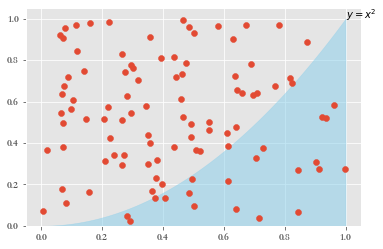

In [ ]:
# 蒙特卡洛积分计算的原理：
x_arr = np.linspace(0,1,1000)
x_n = uniform.rvs(size = 100)  # 随机选择n个x随机数
y_n = uniform.rvs(size = 100)  # 随机选择n个y随机数
plt.stackplot(x_arr,np.square(x_arr),alpha=0.5,color="skyblue") #堆积面积图
plt.scatter(x_n,y_n)
plt.text(1.0,1.0,r'$y=x^2$')
plt.show()

In [ ]:
# 使用蒙特卡洛法计算y=x^2在【0，1】上的定积分
from scipy.stats import uniform
def MonteCarloRandom(n):
    x_n = uniform.rvs(size = n)  # 随机选择n个x随机数
    y_n = uniform.rvs(size = n)  # 随机选择n个y随机数
    f_x = np.square(x_n)    # 函数值f_x = x**2
    binory_y = [1.0 if y_n[i] < f_x[i] else 0 for i in range(n)]    # 如果y<x**2则为1，否则为0
    J = np.sum(binory_y) / n
    return J
    
print("y=x**2在[0,1]的定积分为：",integrate(x**2, (x,0,1)))
print("模拟10次的定积分为：",MonteCarloRandom(10))
print("模拟100次的定积分为：",MonteCarloRandom(100))
print("模拟1000次的定积分为：",MonteCarloRandom(1000))
print("模拟10000次的定积分为：",MonteCarloRandom(10000))
print("模拟100000次的定积分为：",MonteCarloRandom(100000))
print("模拟1000000次的定积分为：",MonteCarloRandom(1000000))

y=x**2在[0,1]的定积分为： 1/3
模拟10次的定积分为： 0.3
模拟100次的定积分为： 0.3
模拟1000次的定积分为： 0.34
模拟10000次的定积分为： 0.3302
模拟100000次的定积分为： 0.33285
模拟1000000次的定积分为： 0.333851


### 8.中心极限定理

8.1 独立随机变量收敛于正态分布

大数定律讨论的是在什么条件下（独立同分布且数学期望存在），随机变量序列的算术平均**依概率收敛**到其均值的算术平均。下面，我们来讨论下什么情况下，独立随机变量的和$Y_n = \sum_{i=1}^nX_i$的分布函数会依分布收敛于正态分布。我们使用一个小例子来说明什么是中心极限定理：

我们想研究一个复杂工艺产生的产品误差的分布情况，诞生该产品的工艺中，有许多方面都能产生误差，如：每个流程中所需的生产设备的精度误差、材料实际成分与理论成分的差异带来的误差、工人当天的专注程度、测量误差等等。由于这些因素非常多，每个影响产品误差的因素对误差的影响都十分微笑，而且这些因素的出现也十分随机，数值有正有负。现在假设每一种因素都假设为一个随机变量$X_i$，先按照直觉假设$X_i$服从$N(0,\sigma_i^2)$，零均值假设是十分合理的，因为这些因素的数值有正有负，假设每一个因素的随机变量的方差$\sigma_i^2$是随机的。接下来，我们希望研究的是产品的误差$Y_{n}=X_{1}+X_{2}+\cdots+X_{n}$，当n很大时是什么分布？

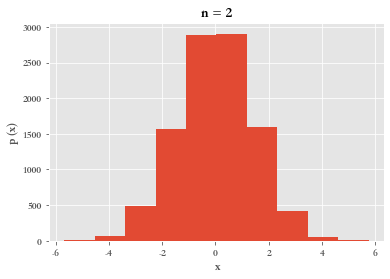

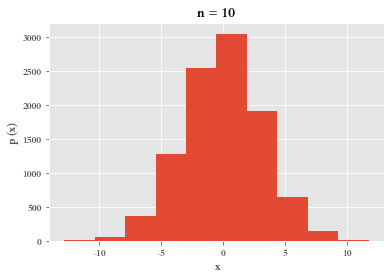

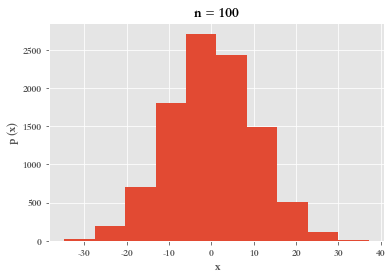

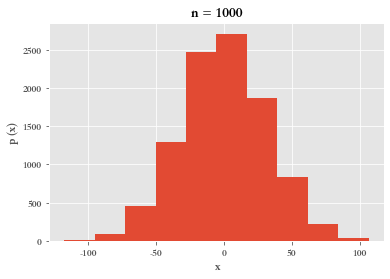

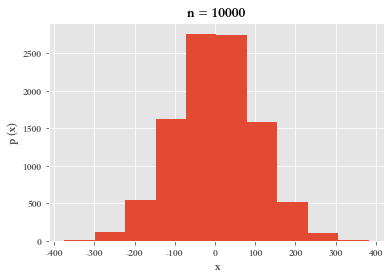

In [ ]:
# 模拟n个正态分布的和的分布
from scipy.stats import norm
def Random_Sum_F(n):
    sample_nums = 10000
    random_arr = np.zeros(sample_nums)
    for i in range(n):
        mu = 0
        sigma2 = np.random.rand()
        err_arr = norm.rvs(size=sample_nums)
        random_arr += err_arr
    plt.hist(random_arr)
    plt.title("n = "+str(n))
    plt.xlabel("x")
    plt.ylabel("p (x)")
    plt.show()

Random_Sum_F(2)
Random_Sum_F(10)
Random_Sum_F(100)
Random_Sum_F(1000)
Random_Sum_F(10000)

8.2 使用中心极限定理产生正态分布随机数

以上实验说明了一个道理：假设 $\left\{X_{n}\right\}$ 独立同分布、方差存在， 不管原来的分布是什么， 只要 $n$ 充分大，就可以用正态分布去逼近随机变量和的分布，所以这个定理有着广泛的应用。下面，我们来看看如何使用中心极限定理产生一组正态分布的随机数！

计算机往往只能产生一组傅聪均匀分布的随机数，那么如果我们想要产生一组服从正态分布$N(\mu,\sigma^2)$的随机数，应该如何操作呢？设随机变量 $X$ 服从 $(0,1)$ 上的均匀分布， 则其数学期望与方差分别为 $1 / 2$ 和 $1 / 12$。 由此得 12 个相互独立的 $(0,1)$ 上均匀分布随机变量和的数学期望与方差分别为 6 和 1。因此：
   - 产生 12 个 $(0,1)$ 上均匀分布的随机数, 记为 $x_{1}, x_{2}, \cdots, x_{12}$。
   - 计算 $y=x_{1}+x_{2}+\cdots+x_{12}-6$， 则由中心极限定理知， 可将 $y$ 近似看成来自标准正态分布 $N(0,1)$ 的一个随机数。
   - 计算 $z=\mu+\sigma y$， 则可将 $z$ 看成来自正态分布 $N\left(\mu, \sigma^{2}\right)$ 的一个随机数。
   - 重复N次就能获得N个服从正态分布$N\left(\mu, \sigma^{2}\right)$ 的随机数。

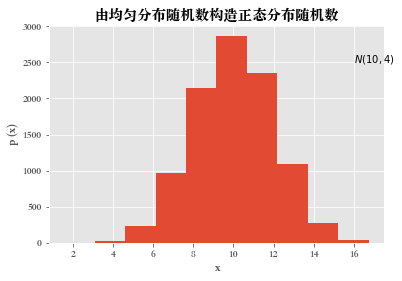

In [ ]:
# 由均匀分布随机数产生N个正态分布的随机数
import random
def Random_Norm(N,mu,sigma):
    random_list = []
    for i in range(N):
        uniform_sum = 0
        for j in range(12):
            uniform_rand = random.random() # [0,1]均匀分布的随机数
            uniform_sum += uniform_rand
        y = uniform_sum - 6
        z = mu + sigma * y
        random_list.append(z)
    return random_list

norm_random_list = Random_Norm(10000,10,2)
plt.hist(np.array(norm_random_list))
plt.xlabel("x")
plt.ylabel("p (x)")
plt.title("由均匀分布随机数构造正态分布随机数")
plt.text(16,2500,r'$N(10,4)$')
plt.show()